In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                    # (nothing gets printed in Jupyter, only if you run it standalone)
sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras

Using TensorFlow backend.


In [2]:
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Reshape, Flatten, Lambda, Conv2DTranspose
from keras.preprocessing import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

In [3]:
# download training and test data from mnist and reshape it

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
output_X_train = X_train.reshape(-1,28,28,1)

X_test = X_test.astype('float32') / 255.
output_X_test = X_test.reshape(-1,28,28,1)

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
# creating autoencoder model
encoder_inputs = Input(shape = (28,28,1))

conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)

enocder_outputs = Dense(32, activation = 'relu')(flat)

In [5]:
#upsampling in decoder

dense_layer_d = Dense(7*7*32, activation = 'relu')(enocder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

autoencoder = Model(encoder_inputs, decoded_outputs)

In [6]:
m = 256
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)

Epoch 1/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.3034
Epoch 2/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.1945
Epoch 3/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1807
Epoch 4/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1482
Epoch 5/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1735
Epoch 6/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1679
Epoch 7/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.1879
Epoch 8/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.1516
Epoch 9/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1375
Epoch 10/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.1494


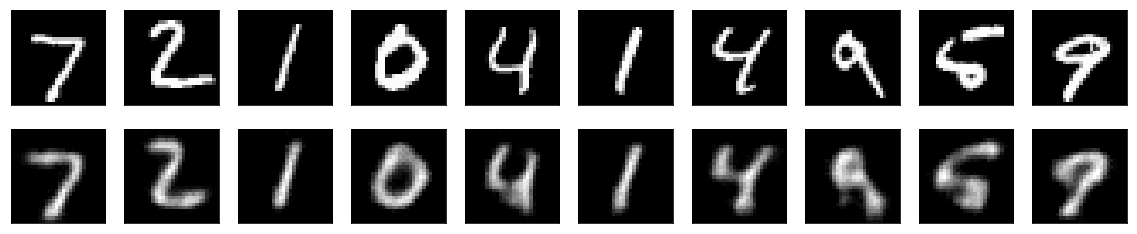

In [7]:
decoded_imgs = autoencoder.predict(output_X_test)

n = 10  # how many digits wil be display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display decoded images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()